In [2]:
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive (Only for Google Colab)
drive.mount('/content/drive')

# Step 2: Load the dataset (Update the path as per your file location)
file_path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(file_path)

# Step 3: Display basic info about the dataset
print("Dataset Info:")
df.info()
#step4

# Fill missing values with mean for numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Fill missing values with "Unknown" for text columns
text_columns = ["artists", "album_name", "track_name", "track_genre"]
df[text_columns] = df[text_columns].fillna("Unknown")
# Step 5: Convert text columns to lowercase for better analysis
text_columns = ["artists", "album_name", "track_name", "track_genre"]
df[text_columns] = df[text_columns].apply(lambda x: x.astype(str).str.lower())
# Fill missing values with mean for numerical columns
numerical_columns = df.select_dtypes(include=["number"]).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()))

# Step 6: Save the cleaned file
cleaned_file_path = "/content/drive/MyDrive/trainee_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Cleaned dataset saved at: {cleaned_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114

<ipython-input-30-1e24ce7aaaba>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="viridis")


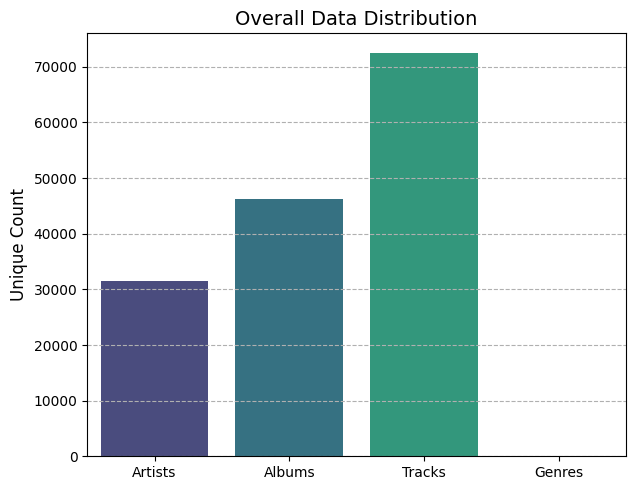

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/trainee_cleaned.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Count occurrences
artist_count = df['artists'].nunique()
album_count = df['album_name'].nunique()
track_count = df['track_name'].nunique()
genre_count = df['track_genre'].nunique()

# Data for bar and pie charts
categories = ["Artists", "Albums", "Tracks", "Genres"]
counts = [artist_count, album_count, track_count, genre_count]

# Plot the bar chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot (bar chart)
sns.barplot(x=categories, y=counts, palette="viridis")
plt.title("Overall Data Distribution", fontsize=14)
plt.ylabel("Unique Count", fontsize=12)
plt.grid(axis="y", linestyle="--")

# Show the charts
plt.tight_layout()
plt.show()


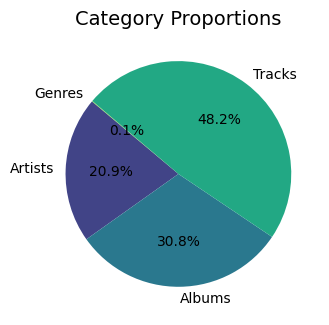

In [ ]:

# Plot the pie chart
plt.subplot(1, 2, 2)  # Second subplot (pie chart)
plt.pie(counts, labels=categories, autopct="%1.1f%%", colors=sns.color_palette("viridis", 4), startangle=140)
plt.title("Category Proportions", fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-31-f42d104c11cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


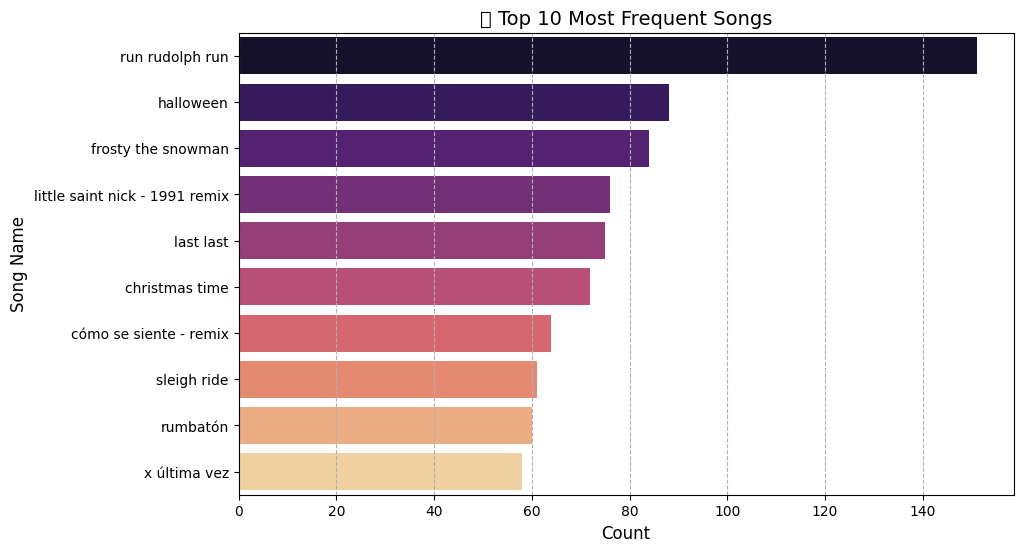

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/trainee_cleaned.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Get the top 10 most frequent songs
top_songs = df["track_name"].value_counts().head(10)

# Plot the chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs.values, y=top_songs.index, palette="magma")

# Customizations
plt.title("🎵 Top 10 Most Frequent Songs", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.grid(axis="x", linestyle="--")

# Show the chart
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


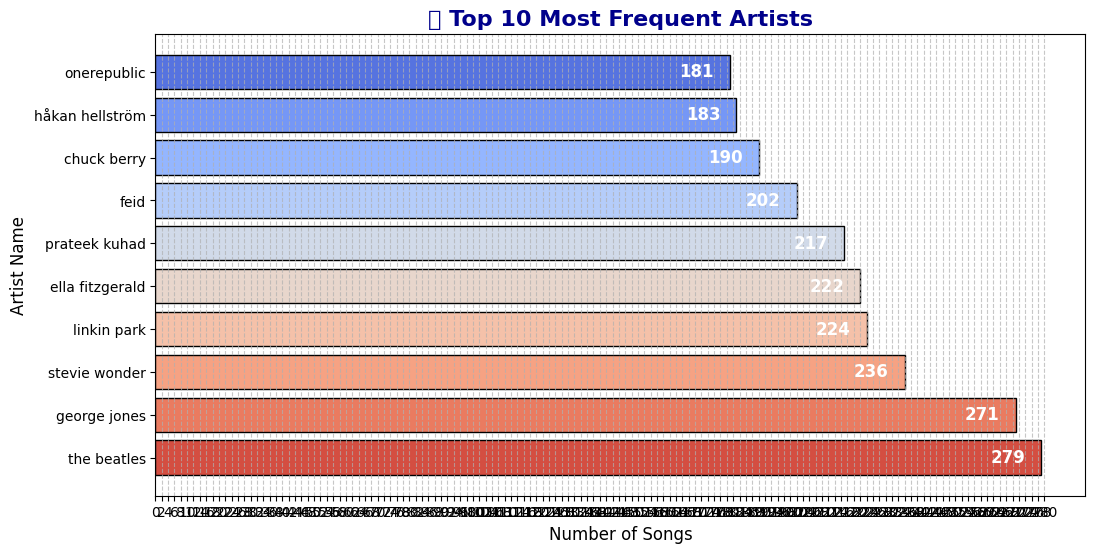

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "/content/drive/MyDrive/trainee_cleaned.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Get the top 10 most frequent artists
top_artists = df["artists"].value_counts().head(10)

# Create color gradient based on artist frequency
colors = sns.color_palette("coolwarm", len(top_artists))

# Plot the chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_artists.index[::-1], top_artists.values[::-1], color=colors, edgecolor="black")

# Add text annotations
for bar, value in zip(bars, top_artists.values[::-1]):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f"{value}", va="center", ha="right", fontsize=12, color="white", fontweight="bold")

# Customizations
plt.title("🎤 Top 10 Most Frequent Artists", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Artist Name", fontsize=12)
plt.xticks(np.arange(0, max(top_artists.values) + 2, step=2))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the chart
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
top_artists = df["artists"].value_counts().head(10).index
top_genres = df["track_genre"].value_counts().head(10).index

df_subset = df[df["artists"].isin(top_artists) & df["track_genre"].isin(top_genres)]
artist_genre_counts = df_subset.pivot_table(index="artists", columns="track_genre", aggfunc="size", fill_value=0)

sns.heatmap(artist_genre_counts, cmap="Blues", linewidths=0.5, annot=True, fmt="d")

plt.title("🎶 Artist vs. Genre Popularity Heatmap", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.show()



NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


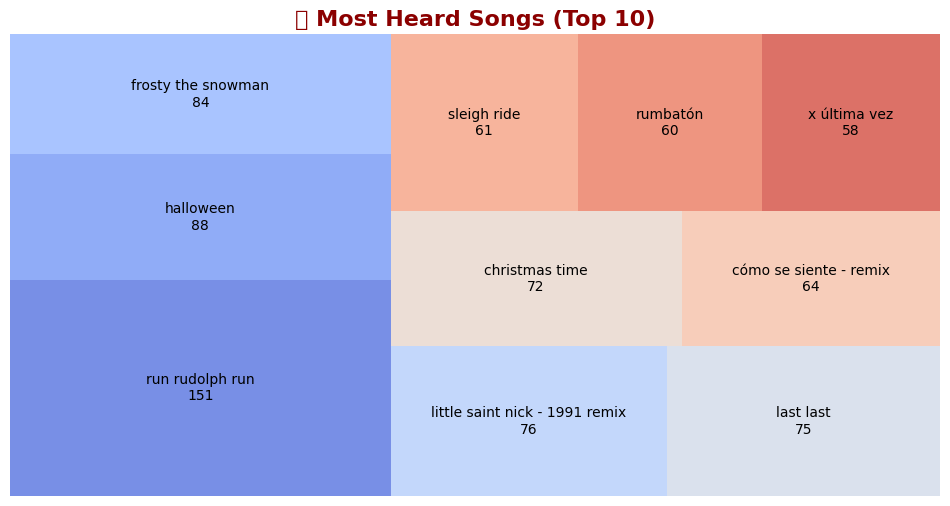

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/trainee_cleaned.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Get Top 10 Most Heard Songs
if "streams" in df.columns:
    song_popularity = df.groupby("track_name")["streams"].sum().nlargest(10)
else:
    song_popularity = df["track_name"].value_counts().head(10)

# Define labels with song name + play count
labels = [f"{name}\n{count:,}" for name, count in zip(song_popularity.index, song_popularity.values)]

# Create Treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=song_popularity.values, label=labels, alpha=0.8, color=sns.color_palette("coolwarm", len(song_popularity)))

# Customizations
plt.title("🎶 Most Heard Songs (Top 10)", fontsize=16, fontweight="bold", color="darkred")
plt.axis("off")  # Remove axes

# Show chart
plt.show()


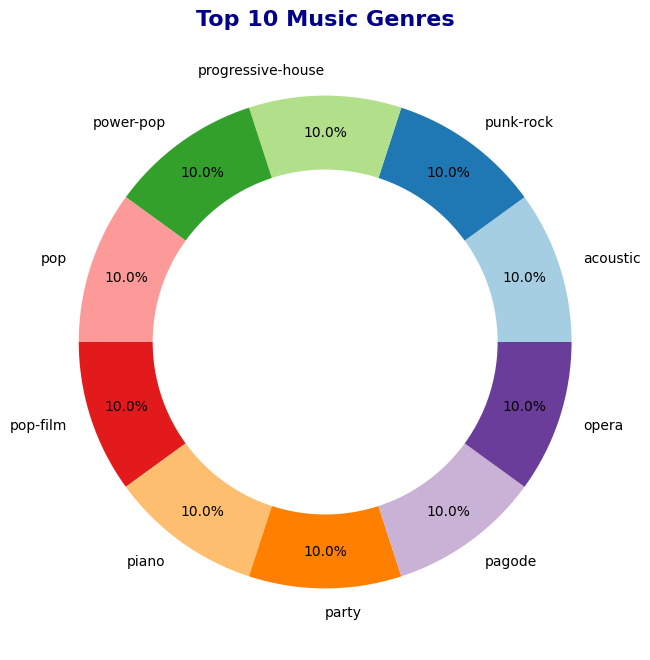

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Get top 10 genres
top_genres = df["track_genre"].value_counts().nlargest(10)

# Create Donut Chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use different colors

# Create a pie chart
plt.pie(top_genres, labels=top_genres.index, autopct="%1.1f%%", colors=colors, pctdistance=0.85)

# Draw a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

# Title
plt.title("Top 10 Music Genres", fontsize=16, fontweight="bold", color="darkblue")

# Show chart
plt.show()

<ipython-input-23-aac9846bc6c8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_duration.index, y=genre_duration.values, palette="viridis")


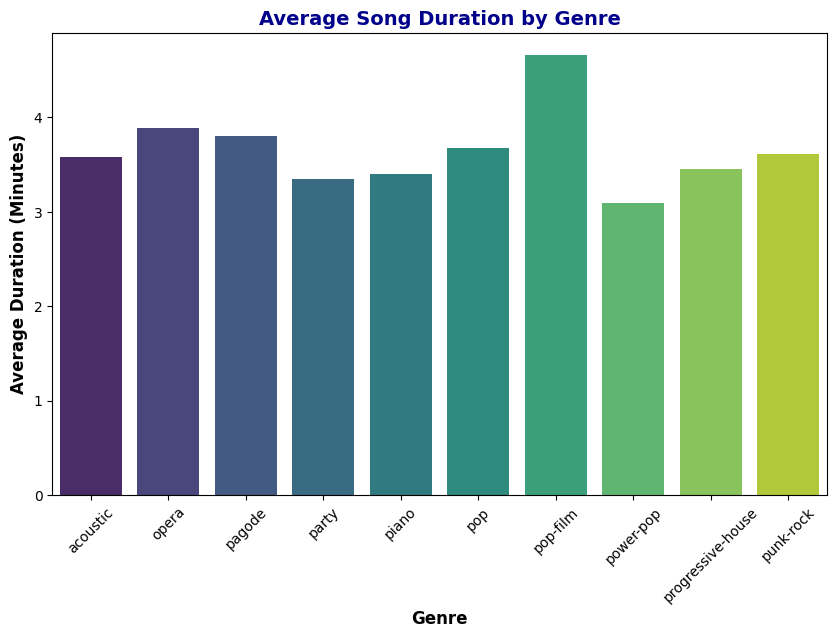

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get the top 10 genres based on song count
top_genres = df["track_genre"].value_counts().nlargest(10).index

# Filter dataset for only top genres
filtered_df = df[df["track_genre"].isin(top_genres)]

# Group by genre and calculate average duration in minutes
genre_duration = filtered_df.groupby("track_genre")["duration_ms"].mean() / 60000

# Plot using a barplot for duration comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_duration.index, y=genre_duration.values, palette="viridis")

# Labels and Title
plt.xlabel("Genre", fontsize=12, fontweight="bold")
plt.ylabel("Average Duration (Minutes)", fontsize=12, fontweight="bold")
plt.title("Average Song Duration by Genre", fontsize=14, fontweight="bold", color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<ipython-input-29-0ee5711ddc6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs["duration_minutes"], y=top_songs["track_name"], palette="magma", orient="h")


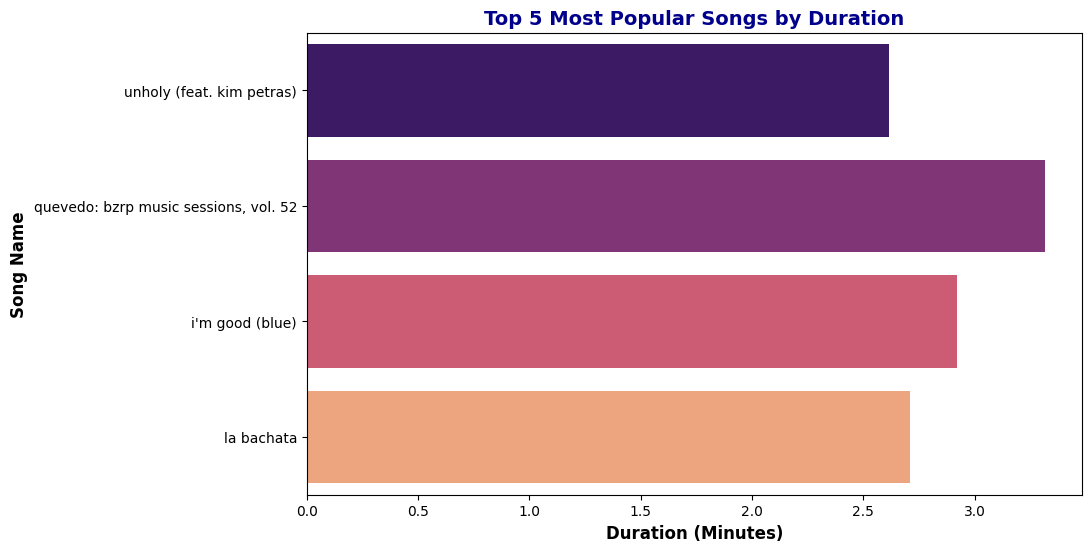

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 most popular songs
top_songs = df.nlargest(10, "popularity")[["track_name", "duration_ms"]]

# Convert duration from milliseconds to minutes
top_songs["duration_minutes"] = top_songs["duration_ms"] / 60000

# Plot using a bar chart to show song durations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs["duration_minutes"], y=top_songs["track_name"], palette="magma", orient="h")

# Labels and Title
plt.xlabel("Duration (Minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Song Name", fontsize=12, fontweight="bold")
plt.title("Top 5 Most Popular Songs by Duration", fontsize=14, fontweight="bold", color="darkblue")

# Show the plot
plt.show()

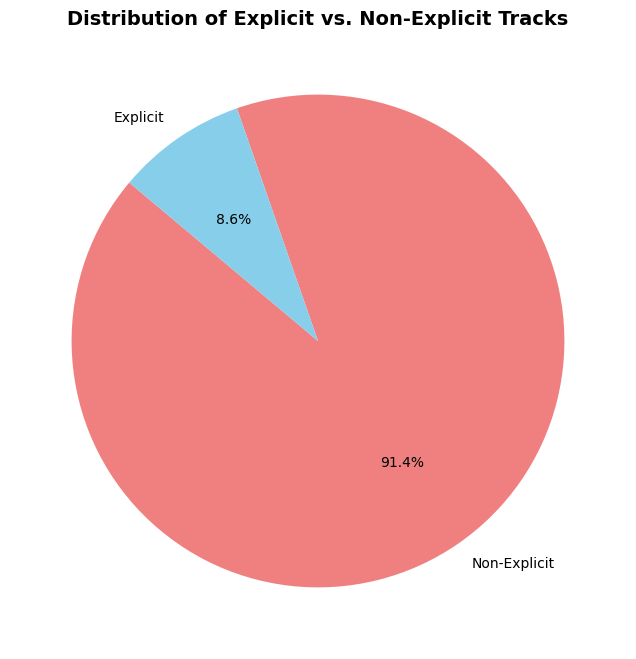

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace True/False with Explicit/Non-Explicit
df["explicit"] = df["explicit"].map({True: "Explicit", False: "Non-Explicit"})

# Count occurrences
explicit_counts = df["explicit"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
colors = ["lightcoral", "skyblue"]
plt.pie(explicit_counts, labels=explicit_counts.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Title
plt.title("Distribution of Explicit vs. Non-Explicit Tracks", fontsize=14, fontweight="bold")

# Show plot
plt.show()

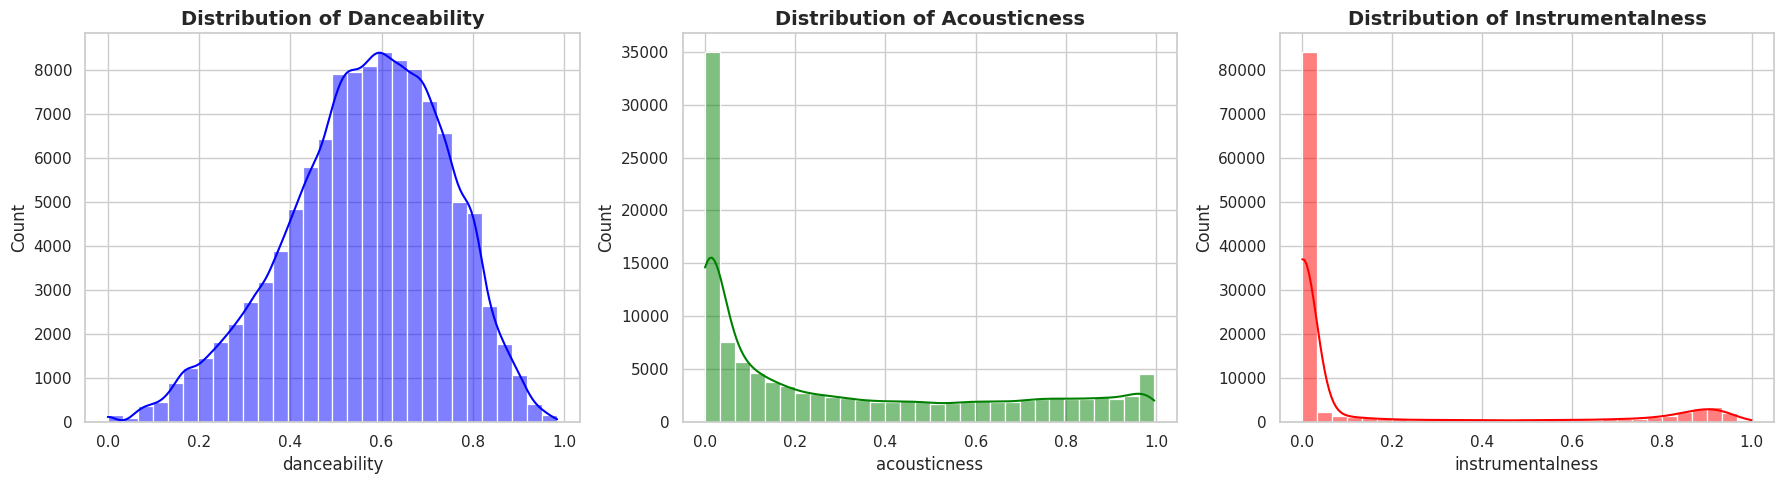

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Selecting relevant columns
features = ["danceability", "acousticness", "instrumentalness"]
df_features = df[features]

# Set plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Danceability Chart (Histogram)
sns.histplot(df["danceability"], bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution of Danceability", fontsize=14, fontweight="bold")

# Acousticness Chart (Histogram)
sns.histplot(df["acousticness"], bins=30, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribution of Acousticness", fontsize=14, fontweight="bold")

# Instrumentalness Chart (Histogram)
sns.histplot(df["instrumentalness"], bins=30, kde=True, color="red", ax=axes[2])
axes[2].set_title("Distribution of Instrumentalness", fontsize=14, fontweight="bold")

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select important features for clustering
important_features = ["danceability", "energy", "loudness", "acousticness",
                      "instrumentalness", "valence", "duration_ms"]

# Create an independent copy to avoid SettingWithCopyWarning
df_filtered = df[important_features].copy()

# Normalize the features for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# Apply K-Means Clustering
k = 4  # Define number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_filtered.loc[:, "Cluster"] = kmeans.fit_predict(df_scaled)  # FIX: Using .loc[] to avoid warning

# Pair Plot (Scatter matrix) with clusters
sns.set_style("whitegrid")
pairplot = sns.pairplot(df_filtered, diag_kind="kde", corner=True, hue="Cluster", palette="tab10")

# Add a title to the overall figure (without the emoji to avoid font issues)
pairplot.fig.suptitle("Scatter Matrix of Audio Features with K-Means Clusters",
                      fontsize=16, fontweight="bold", y=1.02)

# Show plot
plt.show()
#Danceability (how suitable a track is for dancing)
#Energy (intensity and activity level)
#Loudness (volume in decibels)
#Acousticness (presence of acoustic sounds)
#Instrumentalness (whether a track contains vocals)
#Valence (positivity of a song)
#Duration (length of the track)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
#Predict Genre of a Song (Multi-Class Classification)
#📌 Goal: Predict the genre of a song based on its features.
#🔹 Features Used: danceability, instrumentalness, acousticness, loudness, etc.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Selecting relevant features
features = [
    "danceability", "instrumentalness", "acousticness", "loudness",
    "energy", "speechiness", "liveness", "valence", "tempo", "popularity", "duration_ms"
]
X = df[features]
y = df["track_genre"]

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Classification Report:\n", classification_report_dt)
print("Confusion Matrix:\n", conf_matrix)


Decision Tree Accuracy: 0.2123
Classification Report:
                    precision    recall  f1-score   support

         acoustic       0.10      0.09      0.09       200
         afrobeat       0.20      0.20      0.20       200
         alt-rock       0.02      0.05      0.03       200
      alternative       0.07      0.09      0.08       200
          ambient       0.21      0.23      0.22       200
            anime       0.07      0.09      0.08       200
      black-metal       0.44      0.48      0.46       200
        bluegrass       0.30      0.29      0.29       200
            blues       0.12      0.19      0.15       200
           brazil       0.03      0.04      0.04       200
        breakbeat       0.33      0.34      0.33       200
          british       0.03      0.04      0.03       200
         cantopop       0.17      0.16      0.16       200
    chicago-house       0.42      0.42      0.42       200
         children       0.28      0.23      0.25       200


In [14]:
#conclusion
import pandas as pd


# Drop "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Basic statistics
summary = {
    "Total Tracks": len(df),
    "Unique Artists": df["artists"].nunique(),
    "Unique Albums": df["album_name"].nunique(),
    "Unique Genres": df["track_genre"].nunique(),
    "Average Popularity": df["popularity"].mean(),
    "Average Energy": df["energy"].mean(),
    "Average Danceability": df["danceability"].mean(),
    "Summary Conclusion": "The dataset contains a diverse collection of music tracks. On average, the tracks have moderate popularity, energy, and danceability, providing key insights into music trends."
}

# Convert summary to DataFrame and print output
report_df = pd.DataFrame({
    "Metric": summary.keys(),
    "Value": summary.values()
})
print(report_df)


                 Metric                                              Value
0          Total Tracks                                             114000
1        Unique Artists                                              31430
2         Unique Albums                                              46155
3         Unique Genres                                                114
4    Average Popularity                                          33.238535
5        Average Energy                                           0.641383
6  Average Danceability                                             0.5668
7    Summary Conclusion  The dataset contains a diverse collection of m...
